# Чуть-чуть математики

Теперь давайте попробуем написать функцию. Например, чтобы приближённо считала синус. Для небольших $x$:

$$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots + R(x) =
\sum_{n=0}^N (-1)^n \frac{x^{2n+1}}{(2n+1)!} + R(x),$$

причём $R(x) \xrightarrow[N \rightarrow \infty]{} 0$.

Это частичная сумма т.н. ряда Тейлора:

$$ f(x) = f(a)+\sum_{k=1}^\infty {f^{(k)} (a) \over k!} (x - a)^k. $$

In [28]:
import math

iterations = 20

def my_cos(x):
    """Вычисление косинуса при помощи частичного суммирования ряда Тейлора"""
    x_pow = 1
    multiplier = 1
    partial_sum = 1
    for n in range(1, iterations):
        x_pow *= x**2 # В цикле постепенно считаем степень
        multiplier *= -1 / (2*n) / (2*n - 1)  # (-1)^n и факториал
        partial_sum += x_pow * multiplier
    
    return partial_sum
    


print(help(math.cos), math.cos(0.4))
print(help(my_cos), my_cos(0.4))

Help on built-in function cos in module math:

cos(x, /)
    Return the cosine of x (measured in radians).

None 0.9210609940028851
Help on function my_cos in module __main__:

my_cos(x)
    Вычисление косинуса при помощи частичного суммирования ряда Тейлора

None 0.921060994002885


выходит у нас немного неточно, но зато...

... Зато наша функция умеет считать косинус комплексного аргумента, легко достигающий пяти и более в мирное время. Мнимая единица ($i$) в Питоне обозначется, как `j`.

Стандартная библиотека тоже умеет, **и поточнее**.

In [29]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

complex_angle = cmath.acos(5)
print('"Угол", на котором косинус достигает пяти:', complex_angle)

print("Достигает ли пяти наш косинус?", my_cos(complex_angle))
print("А библиотечный?", cmath.cos(complex_angle))

"Угол", на котором косинус достигает пяти: -2.2924316695611777j
Достигает ли пяти наш косинус? (5.000000000000001+0j)
А библиотечный? (5+0j)


А какое и где слабое место у нашего косинуса?

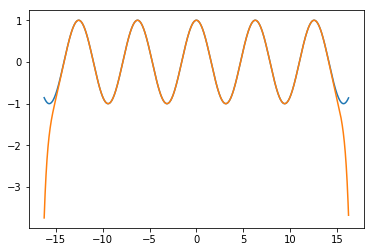

In [30]:
%matplotlib inline

angles = np.r_[-16.25:16.25:0.01]
plt.plot(angles, np.cos(angles))
plt.plot(angles, np.vectorize(my_cos)(angles))
plt.show()

# Задание

Реализовать вычисление частичной суммы [ряда Тейлора для одной из элементарных функций](http://ru.math.wikia.com/wiki/%D0%A0%D1%8F%D0%B4_%D0%A2%D0%B5%D0%B9%D0%BB%D0%BE%D1%80%D0%B0) (кроме синуса 😸), аналогичным образом «испытать» получившиеся функции. 